In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import nltk
import json
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import regex as re

from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier

In [51]:
train = pd.read_csv(r'C:\Users\tonyb\Documents\GA\PROJECTS\DisasterAlert\Training_set.csv')

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6616 entries, 0 to 6615
Data columns (total 3 columns):
Unnamed: 0    6616 non-null int64
text_clean    6616 non-null object
label         6616 non-null int64
dtypes: int64(2), object(1)
memory usage: 155.2+ KB


In [53]:
train.shape

(6616, 3)

In [54]:
train.head()

,Unnamed: 0,text_clean,label
0,0,There are ways for Colorado residents to stret...,1
1,1,RT Residents flee wildfire raging west of Athens,1
2,2,Canada B C s Okanagan braces for more wildfires,1
3,3,Evacuation orders as Ontario s wildfires keep ...,1
4,4,RT How rewildling can prevent wildfires,1


In [55]:
train.describe()

,Unnamed: 0,label
count,6616.000000,6616.000000
mean,2739.039450,0.093108
std,1839.531021,0.290605
min,0.000000,0.000000
25%,1037.750000,0.000000
50%,2691.500000,0.000000
75%,4345.250000,0.000000
max,5999.000000,1.000000


In [56]:
train.drop(['Unnamed: 0'], axis=1, inplace = True)

In [57]:
train.head()

,text_clean,label
0,There are ways for Colorado residents to stret...,1
1,RT Residents flee wildfire raging west of Athens,1
2,Canada B C s Okanagan braces for more wildfires,1
3,Evacuation orders as Ontario s wildfires keep ...,1
4,RT How rewildling can prevent wildfires,1


In [58]:
train['label'].value_counts()

0    6000
1     616
Name: label, dtype: int64

#### TRAIN TEST SPLIT

In [59]:
X = train['text_clean']
y = train.label

In [60]:
y.value_counts(normalize=True)

0    0.906892
1    0.093108
Name: label, dtype: float64

In [86]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                   random_state=42)

#### HYPERTUNE COUNT VECTORIZER

In [87]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('model', MultinomialNB()),
])

In [110]:
pipe_params = {
    'cvec__max_features': [1000,2000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
    
}

In [111]:
gs = GridSearchCV(pipe, 
                  param_grid=pipe_params,
                  cv=3)

In [112]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [100]:
print(gs.best_score_)

0.9857851985559567


In [101]:
gs_model = gs.best_estimator_

In [102]:
gs_model.score(X_train, y_train)

0.9880415162454874

In [103]:
gs_model.score(X_test, y_test)

0.9812271062271062

#### APPLY COUNT VECTORIZER

In [13]:
cvec=CountVectorizer(stop_words=('english'),max_features=1000,ngram_range=(1,2))

In [14]:
cvec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1000, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [15]:
print(cvec.vocabulary_)

{'rt': 700, 'wanna': 926, 'really': 679, 'video': 914, 'check': 160, 'brother': 137, 'mean': 548, 'wrong': 983, 'okay': 606, 'felt': 305, 'like': 500, 'inside': 441, 'start': 806, 'war': 930, 'pay': 622, 'shit': 773, 'fly': 318, 'home': 411, 'perfect': 628, 'warning': 931, 'services': 766, 'area': 77, 'trump': 883, 'putin': 664, 'called': 144, 'question': 666, 'long': 521, 'term': 845, 'russian': 735, 'man': 543, 'don': 245, 'know': 477, 'love': 533, 'woman': 964, 'ain': 63, 'real': 676, 'friends': 332, 'rt don': 706, 'don know': 247, 'life': 499, 'twitter': 896, 'making': 542, 'talking': 838, 'thing': 852, 'does': 241, 'wait': 922, 'meet': 551, 'greece': 365, 'fires': 314, 'live': 513, '60': 35, 'dead': 213, '150': 11, 'injured': 439, 'worst': 976, 'wildfires': 951, 'decade': 223, 'athens': 87, 'rt greece': 710, 'worst wildfires': 977, 'wildfires decade': 954, 'realize': 678, 'everyday': 276, 'quite': 668, 'lot': 530, 'people': 624, 'doing': 244, 'listen': 509, 'facts': 289, 'right': 

In [16]:
X_train_cvec = cvec.transform(X_train)

In [17]:
X_test_cvec = cvec.transform(X_test)

In [18]:
c_train = pd.DataFrame(X_train_cvec.toarray(),
                        columns=cvec.get_feature_names())

In [19]:
c_test = pd.DataFrame(X_test_cvec.toarray(),
                        columns=cvec.get_feature_names())

#### CONDUCT EDA ON RESULTING CVEC DATA SETS

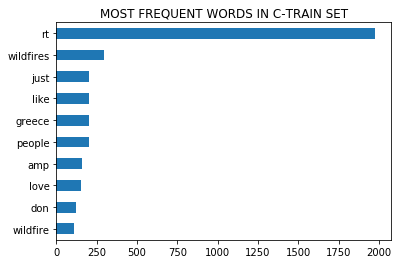

In [20]:
c_train.sum().sort_values().tail(10).plot(kind = 'barh');
plt.title("MOST FREQUENT WORDS IN C-TRAIN SET");

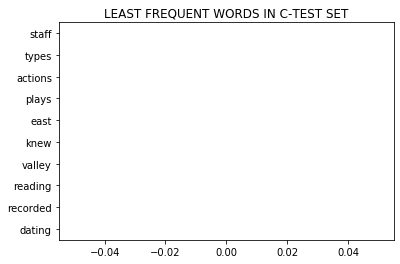

In [23]:
c_test.sum().sort_values().head(10).plot(kind='barh');
plt.title("LEAST FREQUENT WORDS IN C-TEST SET");

#### NOTE: 
 - Based on the high presence of the pronoun "it" in the train and test sets, "it" should be added to stopwords

#### MULTINOMIAL NAIVE BAYES MODEL WITH CVEC

In [128]:
model= MultinomialNB()

In [129]:
model.fit(X_train_cvec, y_train);

In [130]:
preds = model.predict(X_test_cvec)

In [133]:
#provides us with the accuracy score
model.score(X_test_cvec,y_test)

0.9885531135531136

In [134]:
confusion_matrix(y_test, 
                 preds) 

array([[1964,   17],
       [   8,  195]], dtype=int64)

In [135]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

#### HYPERTUNE TFIDF VECTORIZER

In [117]:
pipe2 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [118]:
pipe2_params = {
    'tvec__max_features': [1000,2000],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1,1), (1,2)],
    
}

In [119]:
gs2 = GridSearchCV(pipe, 
                  param_grid=pipe_params,
                  cv=3)

In [120]:
gs2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

In [121]:
print(gs2.best_score_)

0.9785649819494585


In [122]:
gs2_model = gs.best_estimator_

In [123]:
gs2_model.score(X_train, y_train)

0.9839801444043321

In [124]:
gs2_model.score(X_test, y_test)

0.9821428571428571

####  APPLY AND EVALUATE TFIDF VECTORIZER

In [24]:
tvec =TfidfVectorizer(stop_words='english',max_features=1000,ngram_range=(1,2))

In [25]:
tvec.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [26]:
print(tvec.vocabulary_)

{'rt': 700, 'wanna': 926, 'really': 679, 'video': 914, 'check': 160, 'brother': 137, 'mean': 548, 'wrong': 983, 'okay': 606, 'felt': 305, 'like': 500, 'inside': 441, 'start': 806, 'war': 930, 'pay': 622, 'shit': 773, 'fly': 318, 'home': 411, 'perfect': 628, 'warning': 931, 'services': 766, 'area': 77, 'trump': 883, 'putin': 664, 'called': 144, 'question': 666, 'long': 521, 'term': 845, 'russian': 735, 'man': 543, 'don': 245, 'know': 477, 'love': 533, 'woman': 964, 'ain': 63, 'real': 676, 'friends': 332, 'rt don': 706, 'don know': 247, 'life': 499, 'twitter': 896, 'making': 542, 'talking': 838, 'thing': 852, 'does': 241, 'wait': 922, 'meet': 551, 'greece': 365, 'fires': 314, 'live': 513, '60': 35, 'dead': 213, '150': 11, 'injured': 439, 'worst': 976, 'wildfires': 951, 'decade': 223, 'athens': 87, 'rt greece': 710, 'worst wildfires': 977, 'wildfires decade': 954, 'realize': 678, 'everyday': 276, 'quite': 668, 'lot': 530, 'people': 624, 'doing': 244, 'listen': 509, 'facts': 289, 'right': 

In [27]:
X_train_tvec = tvec.transform(X_train)

In [146]:
X_test_tvec = tvec.transform(X_test)

In [147]:
t_train = pd.DataFrame(X_train_tvec.toarray(),
                        columns=cvec.get_feature_names())

In [148]:
t_test = pd.DataFrame(X_test_tvec.toarray(),
                        columns=cvec.get_feature_names())

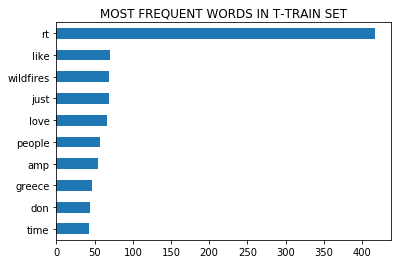

In [149]:
t_train.sum().sort_values().tail(10).plot(kind = 'barh');
plt.title("MOST FREQUENT WORDS IN T-TRAIN SET");

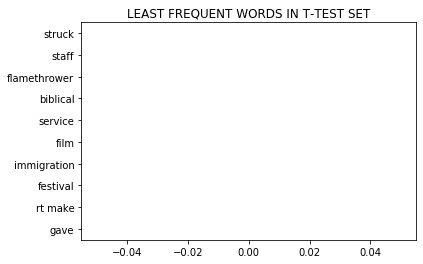

In [150]:
t_test.sum().sort_values().head(10).plot(kind='barh');
plt.title("LEAST FREQUENT WORDS IN T-TEST SET");

#### INSTANTIATE MULTINOMIAL NAIVE BAYES MODEL WITH TFIDF

In [151]:
model= MultinomialNB()

In [152]:
model.fit(X_train_tvec, y_train);

In [153]:
preds = model.predict(X_test_tvec)

In [154]:
#provides us with the accuracy score
model.score(X_test_tvec,y_test)

0.9839743589743589

In [155]:
confusion_matrix(y_test, 
                 preds) 

array([[1979,    2],
       [  33,  170]], dtype=int64)

In [156]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()